# Seismic refraction inversion example
Stefan Nielsen, Durham University, 2024

## 1) Input names of files containing picked arrival times for all shot gathers
## 2) Process, initialise and plot arrival times for all shot gathers 
## 3) Run inverse problem, option of tuning parameters 
## 4) Plot results

- Run notebook cells sequentially
- arrival time files can be created by using "Picking_3_4"
- Requires companion files:<br>
 Init_Picking_3_4.py,  dict.yml, \_\_init\_\_.py, Init_Seismic_Inversion_3_4.py
- Example data files are in folder ExampleData/   

In [1]:
from Init_Seismic_Inversion_3_5 import *
%matplotlib ipympl
VBox([lin_0,HBox([col_1, col_2, col_3, col_4])])

# 2) Process and plot all arrival times:

Data: Sensors: 30 data: 164, nonzero entries: ['err', 'g', 's', 't', 'valid']


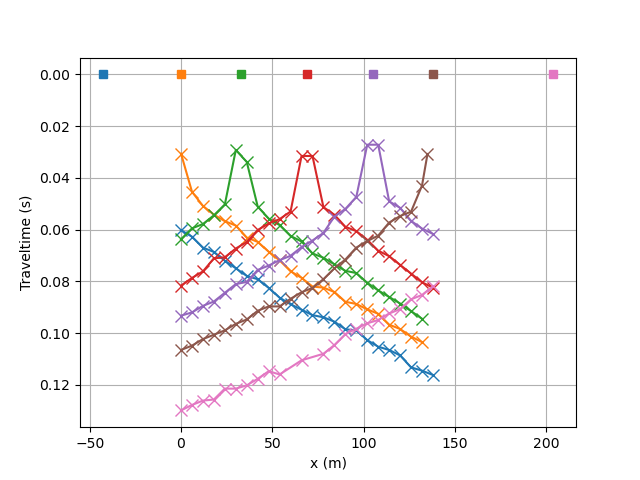

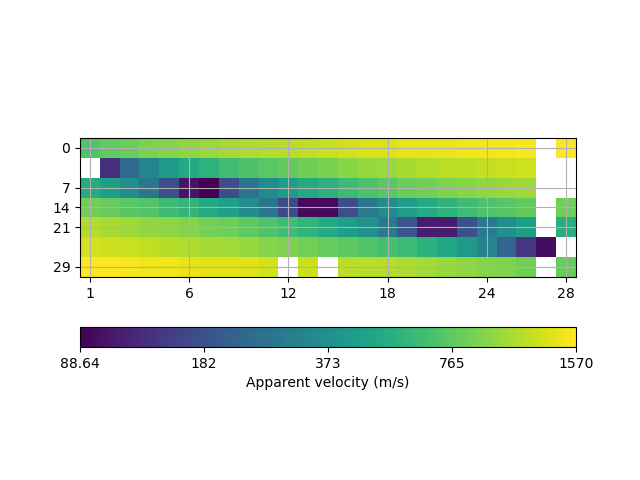

In [2]:
fout=fpath.value + uni2file.value
data = pg.DataContainer(fout, "s g t")
ra = TravelTimeManager(fout)
print(data)
##
ra.showData(firstPicks=True);  # show first arrivals as curves (done later with response)
ra.showData(firstPicks=False);

## 3) Run the inversion 
call `invert` to estimate model. The mesh is created on-the-fly based on the sensor positions

### OPTIONAL PARAMETERS AND SOME INDICATIVE VALUES:
<code>
 maxIter=12             | Will stop after maxIter cycles if not converged yet 
 quality = 28           | Quality of the mesh. Lower if code crashes.
 useGradient=True       | Inital model has a vertical velocity gradient or not
 vTop=150, vBottom=3000 | Initial model gradient is imposed by setting top and bottom velocities.
                          Usually leave these out by commenting them with #
 limits=[150,3000]      | Limits to max and min possible velocities in model.
                          Use max min estimates from linear fit of arrival times.
 paraMaxCellSize=10     | Limit the size of the cells in the mesh. Small look nicer but slower. 
                          Increase if code crashes. Start testing with large values. 
                          When happy with result, reduce to approximate geophone spacing. 
 paraDepth=50           | Likely penetration depth of the survey, plus some
 zWeight=0.2            | 0-1, smaller value will perfer layered solution. 
 lam= 50                | Regularisation parameter, will prefer smoother (reduced curvature) solutions if large.
                          Large lam will also converge faster.
 cType=1                | Set the type of mninimisation process, should not make a big difference
 verbose=0              | Printout a lot of info if set to 1
</code>


In [3]:
print("this may take a few minutes....");print("...");print("...")

ra = TravelTimeManager(fout)

ra.invert(maxIter=12, 
          quality = 28,
          useGradient=False, 
          #vTop=150, vBottom=3400, 
          limits=[200,3400],
          paraMaxCellSize=5, paraDepth=40,
          zWeight=0.2, cType=3, lam= 60,
          verbose=0)
print('done!')

./core/src/meshentities.cpp:36		GIMLI::Boundary* GIMLI::findBoundary_(const std::set<Boundary*>&) 26/05/24 - 14:45:25 - pyGIMLi - INFO - Found 1 regions.
 pls. check, this should not happen.  There is more than one boundary defined.2
Boundary 0x5652789786a0 rtti: 22 id: 60	N: 4 0  marker: -1 
Boundary 0x565278988120 rtti: 22 id: 0	N: 0 1  marker: 1 
26/05/24 - 14:45:25 - pyGIMLi - INFO - Found 1 regions.
26/05/24 - 14:45:25 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/05/24 - 14:45:25 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.


this may take a few minutes....
...
...


/home/stefan/anaconda3/envs/geo05/lib/python3.11/site-packages/pygimli/physics/traveltime/modelling.py:79: RuntimeWarning: divide by zero encountered in divide
  aSlow = 1. / (dists / dataVals)
26/05/24 - 14:45:25 - pyGIMLi - INFO - Create constant starting model: 0.0012087241462243
26/05/24 - 14:45:25 - pyGIMLi - INFO - Created startmodel from forward operator: 3109, min/max=0.001209/0.001209


done!


# 4) Plot the resulting estimated model

(-40.0, 0.0)

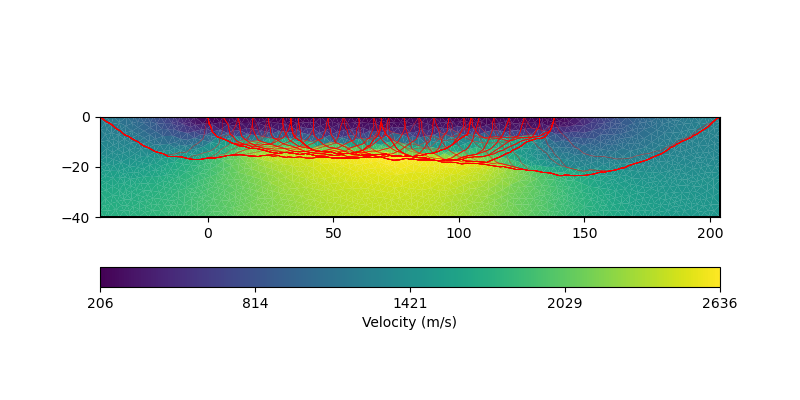

In [4]:
fig,ax=plt.subplots(figsize=(8,4))
ra.showResult(ax=ax, logScale=False)
ra.drawRayPaths(ax=ax, color="r", lw=.5, alpha=.5)
ax.set_ylim(bottom=-40)
#ax.set_xlim(-50,210);